## Sales Prediction Using Machine Learning


### Problem statement
The project understands how the sales price is affected by different variables such as Console, Year, Category, and Publisher.

#### Import Data and Required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
data = pd.read_csv('../data/Train.csv')

Show Top 5 Records

In [4]:
data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


Shape of the Dataset

In [5]:
data.shape

(3506, 9)

**Dataset Information**

* id : unique id of the video game
* console: type of console the game was released
* year : year of the game
* Publisher: name of the game publisher
* Rating : rating of the game
* critics points : number of reviews posted by critics
* user points : number of users
* SalesInMillions : sales obtained by the game In millions

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


### **Data Checks**

1. Check for missing values
2. Check for duplicate values
3. Check data type
4. Check the number of uniques values in each column
5. Check statistics of the dataset
6. Check various categories present in the different categorical columns


**Check for missing values**

In [7]:
data.isna().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

There are no missing values in the dataset

**Check for duplicates**

In [8]:
data.duplicated().sum()

0

There are no duplicate values in the dataset

**Check data types**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


**Checking the number of unique values in the columns**

In [10]:
data.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

**Check the statistics of the dataset**

In [11]:
data.describe()

,ID,YEAR,CRITICS_POINTS,USER_POINTS,SalesInMillions
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,2282.233600,2008.990302,3.790831,0.405824,2.171021
std,1287.273422,4.304252,3.141781,0.455541,2.495396
min,1.000000,1997.000000,0.568966,0.000341,0.001524
25%,1220.250000,2006.000000,1.738095,0.065966,0.965679
50%,2262.500000,2009.000000,2.766667,0.233333,1.866140
75%,3404.750000,2012.000000,4.621528,0.598333,2.792029
max,4523.000000,2019.000000,23.250000,2.325000,84.226041


**Insight**

* The video games are generating an average of 2 million income
* There are 3506 records in the dataset
* The dataset contains the records from 1997 to 2019.
* The video games are given an average of 3 user points and 0 user points.
* All standard deviations are less than 4
* The minimum sales is 0.001524 and maximum sales is 84.226041

### Exploring the data

In [12]:
data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


What are the different categories in categorical columns

In [13]:
print("\nCategories in 'CONSOLE' variable: ")
print(data["CONSOLE"].unique())

print("\nCategories in 'CATEGORY': ")
print(data['CATEGORY'].unique())


print("\nCategories in 'PUBLISHER' variable (first 10): ")
print(data['PUBLISHER'].unique()[:10])

print("\nCategories in 'RATING' variable: ")
print(data['RATING'].unique())


Categories in 'CONSOLE' variable: 
['ds' 'wii' 'pc' 'ps2' 'ps3' 'psp' 'x' 'x360' 'psv' 'gba' 'gc' 'ps' 'wiiu'
 'xone' 'ps4' '3ds' 'dc']

Categories in 'CATEGORY': 
['role-playing' 'simulation' 'shooter' 'sports' 'action' 'platform'
 'strategy' 'racing' 'misc' 'fighting' 'adventure' 'puzzle']

Categories in 'PUBLISHER' variable (first 10): 
['Nintendo' 'Konami Digital Entertainment' 'Activision' 'Electronic Arts'
 'Sony Computer Entertainment' 'Idea Factory' 'Atari' 'Empire Interactive'
 'Paradox Interactive' 'Lucasarts']

Categories in 'RATING' variable: 
['E' 'E10+' 'M' 'T' 'K-A' 'RP']


In [14]:
# Define numerical and  columns
numeric_features = [feature for feature in data.columns if data[feature].dtype!= 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print(f"We have {len(numeric_features)} numeric features")
print(f"We have {len(categorical_features)} categorical features")

We have 5 numeric features
We have 4 categorical features


In [15]:
games_less_than_1_million = data[data["SalesInMillions"] < 1]
games_more_than_1_million = data[data["SalesInMillions"] >= 1]

print("Number of games having less than 1 million sales: ", len(games_less_than_1_million))
print("Number of games having more than 1 million sales: ", len(games_more_than_1_million))

Number of games having less than 1 million sales:  904
Number of games having more than 1 million sales:  2602


In [16]:
# consider performing games as games with atleast 100k income
performing_games = data[data["SalesInMillions"] >= 0.1]
not_performing_games = data[data["SalesInMillions"] < 0.1]

print("Games earning considerable income: ", len(performing_games))
print("Games not earning considerable income: ", len(not_performing_games)) 

Games earning considerable income:  3420
Games not earning considerable income:  86


Information about USER_POINTS and CRITIC_POINTS column

In [17]:
mean_user = data["USER_POINTS"].mean()
mean_critics = data["CRITICS_POINTS"].median()

print("Average points given by users: ", mean_user)
print("Average points given by critics: ", mean_critics) 

Average points given by users:  0.40582390000372687
Average points given by critics:  2.7666666666666666


### Visualizing data

Now let's visualize the dataset using different graphs

**CATEGORY COLUMN**

Univariate Analysis

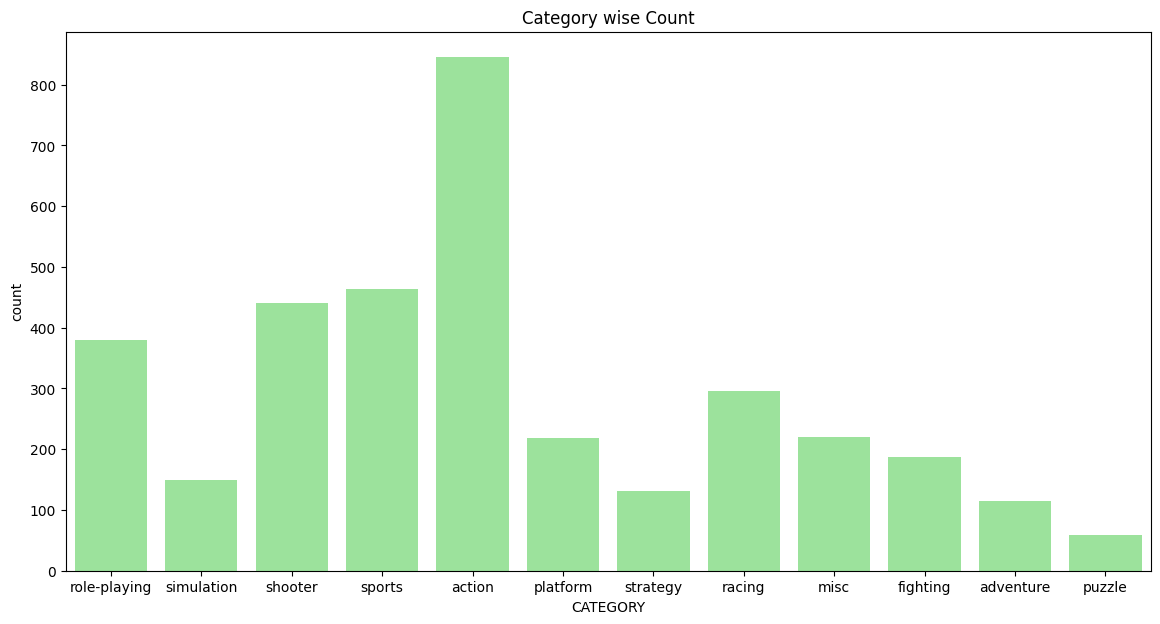

In [18]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x = data["CATEGORY"], color="lightgreen")
plt.title("Category wise Count")
plt.show()

BIVARIATE ANALYSIS(How did category has Impact on the Sales)

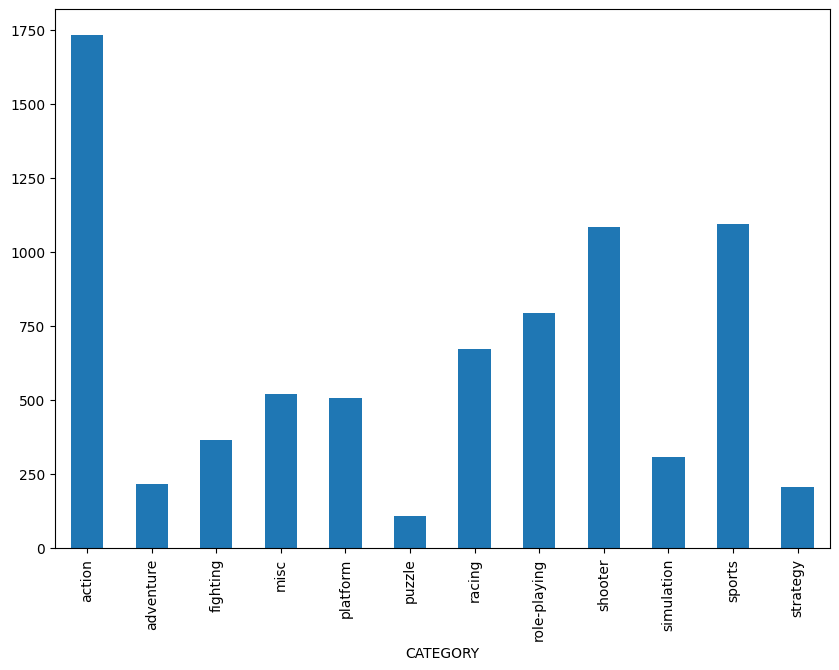

In [19]:
plt.figure(figsize=(10, 7))
grouped_data = data.groupby(data["CATEGORY"]).sum()["SalesInMillions"]
grouped_data.plot(kind="bar")
plt.show()

**YEAR COLUMN**

Univariate

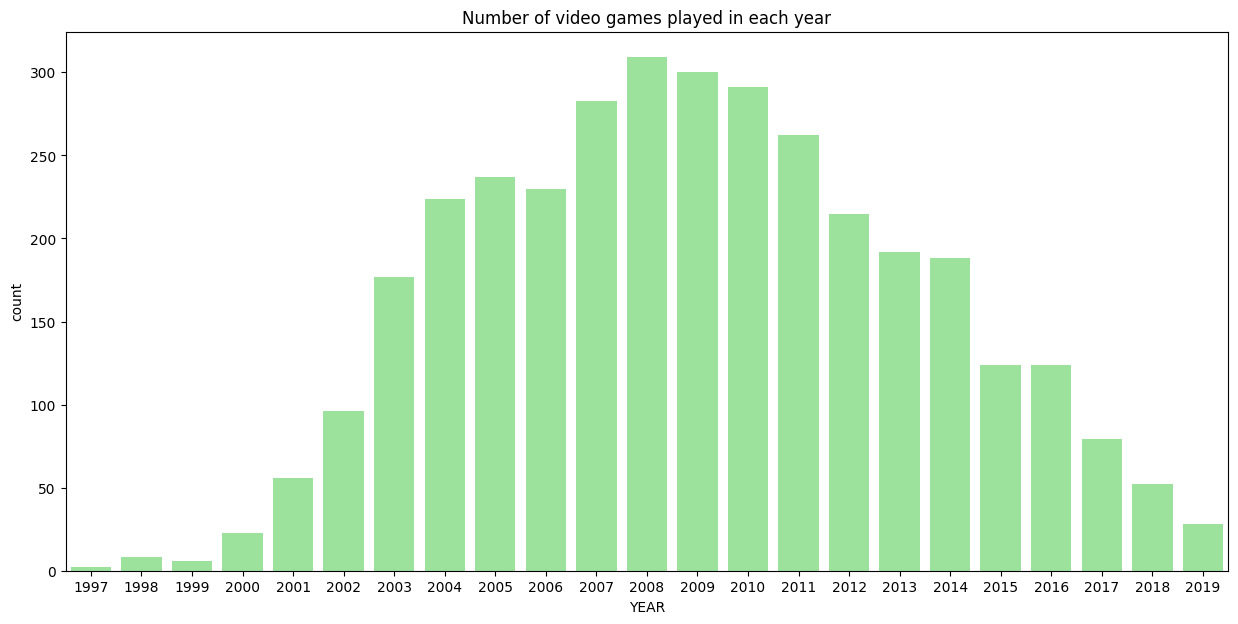

In [20]:
plt.figure(figsize=(15, 7))
sns.countplot(data, x = data["YEAR"], color="lightgreen")
plt.title("Number of video games played in each year")
plt.show()

Bivariate (How does year impact on sales)

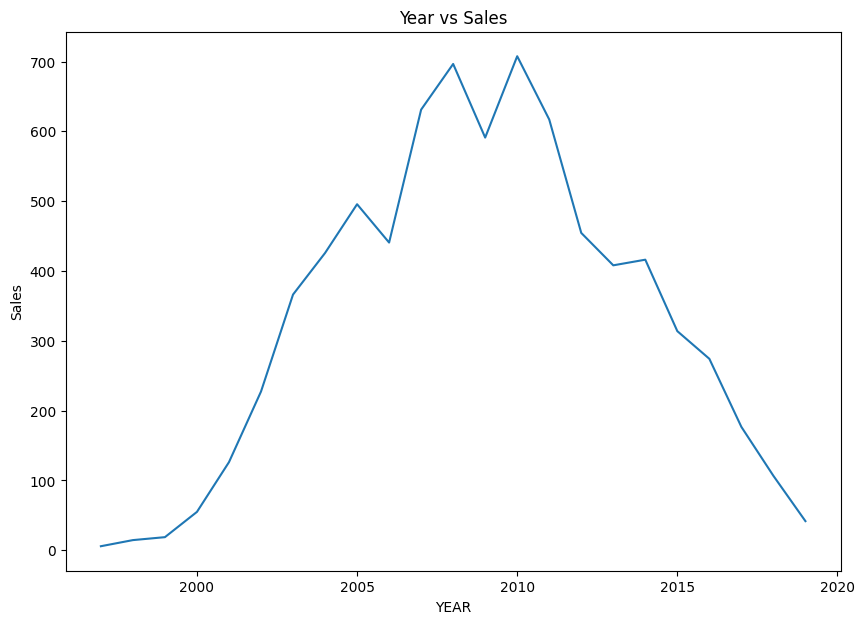

In [85]:
plt.figure(figsize=(10, 7))
grouped_data = data.groupby("YEAR").sum()["SalesInMillions"]
plt.ylabel("Sales")
plt.title("Year vs Sales")
grouped_data.plot(kind='line')
plt.show()

**PUBLISHER COLUMN**

Univariate

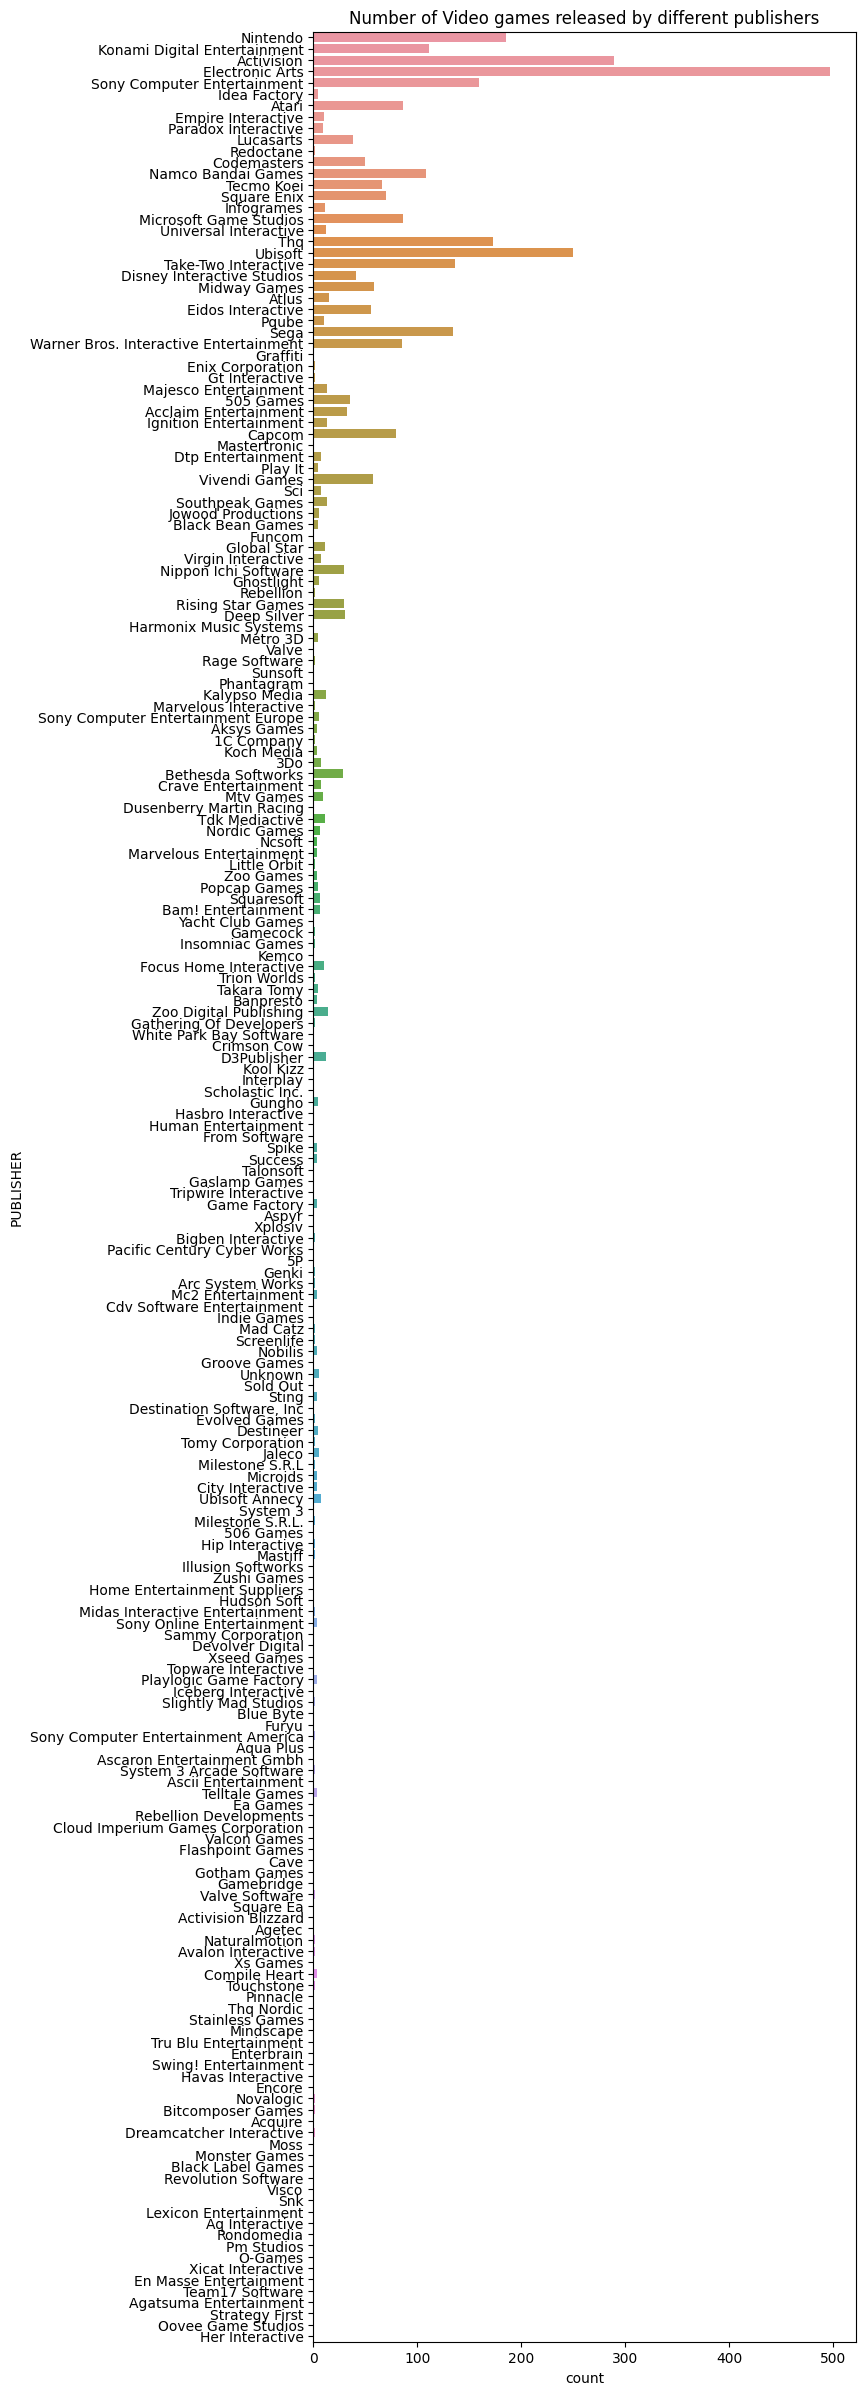

In [86]:
plt.figure(figsize=(7, 30))
sns.countplot(data, y=data["PUBLISHER"], orient="h")
plt.title("Number of Video games released by different publishers")
plt.show()

Bivariate (How does Publisher impact on sales)

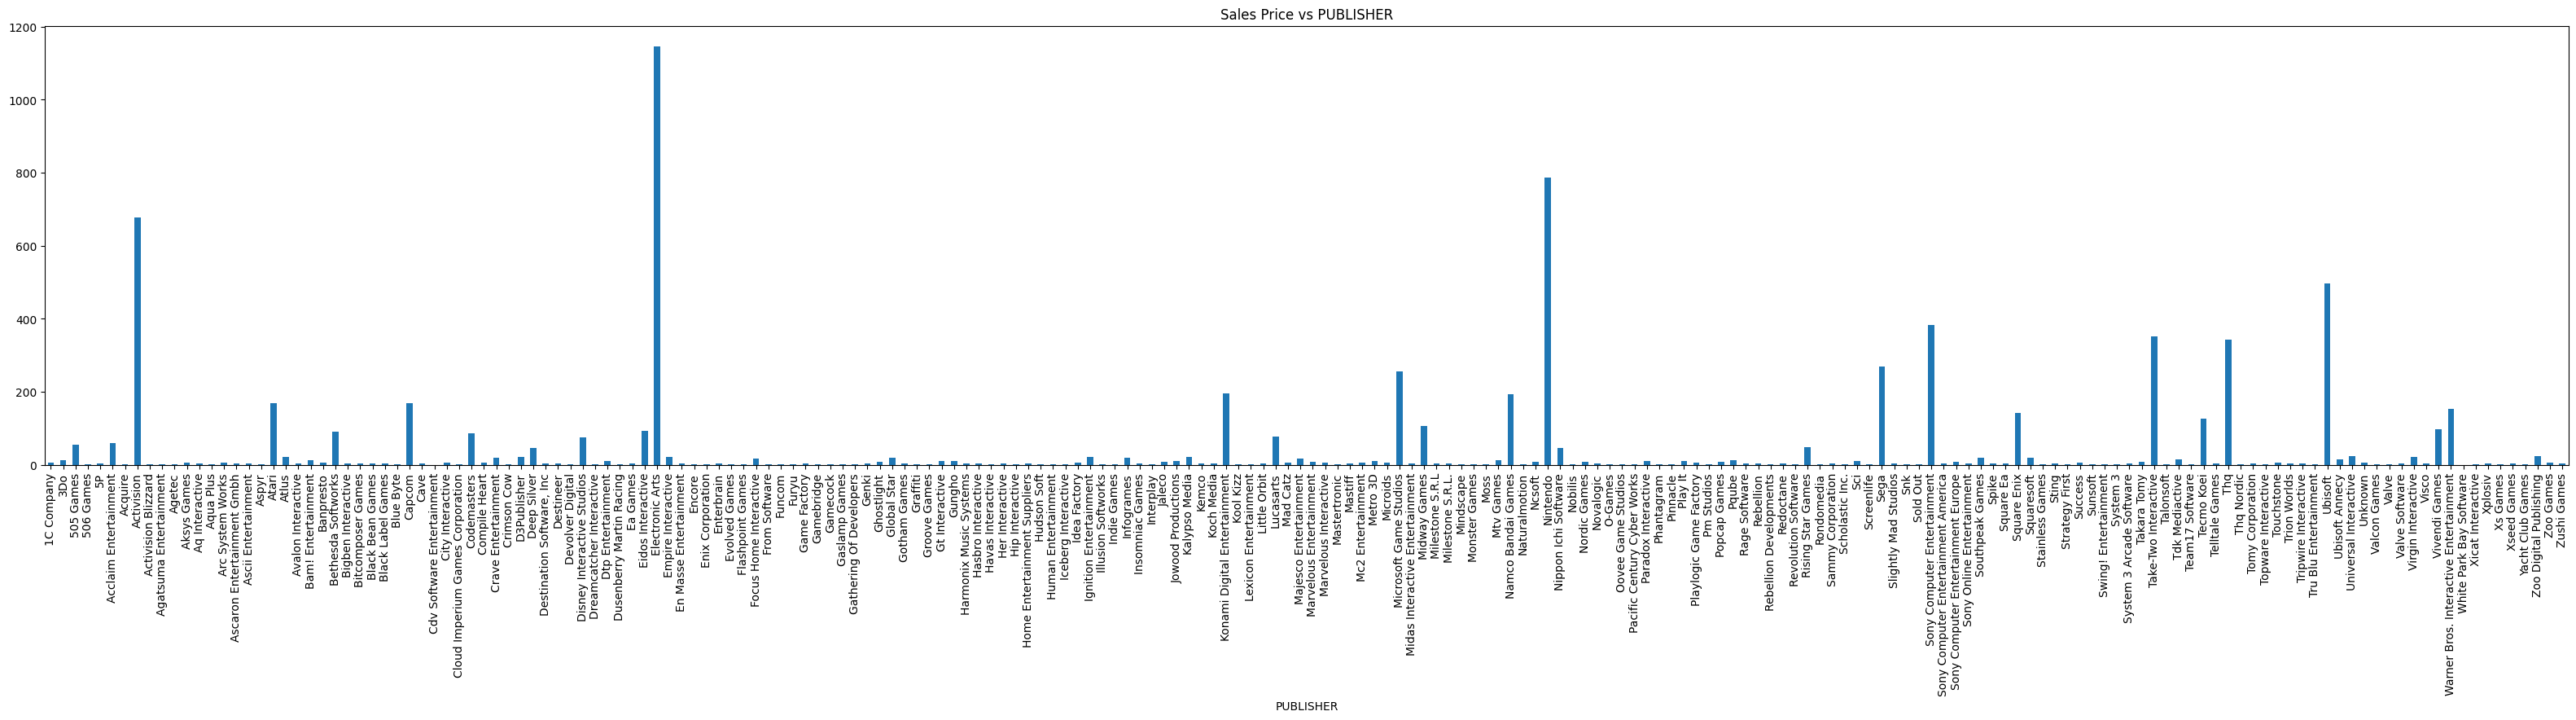

In [82]:
plt.figure(figsize=(40, 7))
grouped_data = data.groupby("PUBLISHER").sum()["SalesInMillions"]
grouped_data.plot(kind='bar')
plt.title("Sales Price vs PUBLISHER")
plt.show()

**RATINGS COLUMN**

Univariate

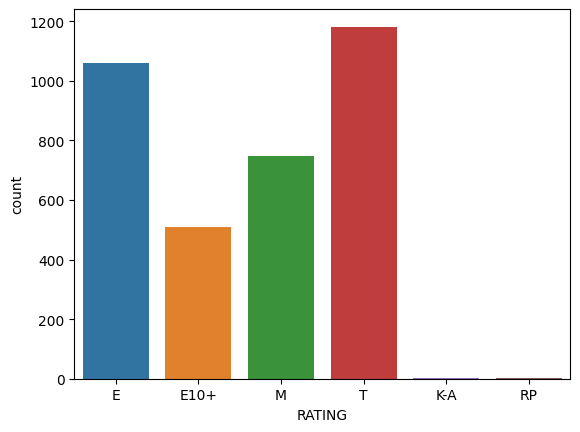

In [24]:

sns.countplot(data, x=data["RATING"])
plt.show()

Bivariate (How does Ratings column effect Sales)

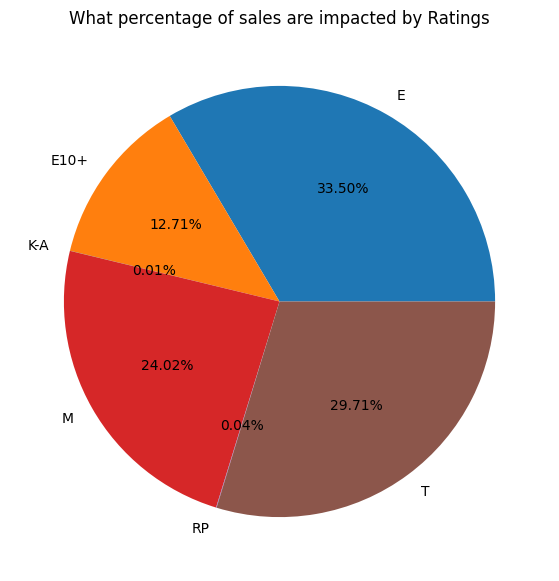

In [81]:
plt.figure(figsize=(10, 7))
grouped_data = data.groupby("RATING").sum()["SalesInMillions"]
grouped_data.plot(kind='pie', autopct="%.2f%%")
plt.title("What percentage of sales are impacted by Ratings")
plt.ylabel("")
plt.show()

**USER POINTS COLUMN**

Univariate

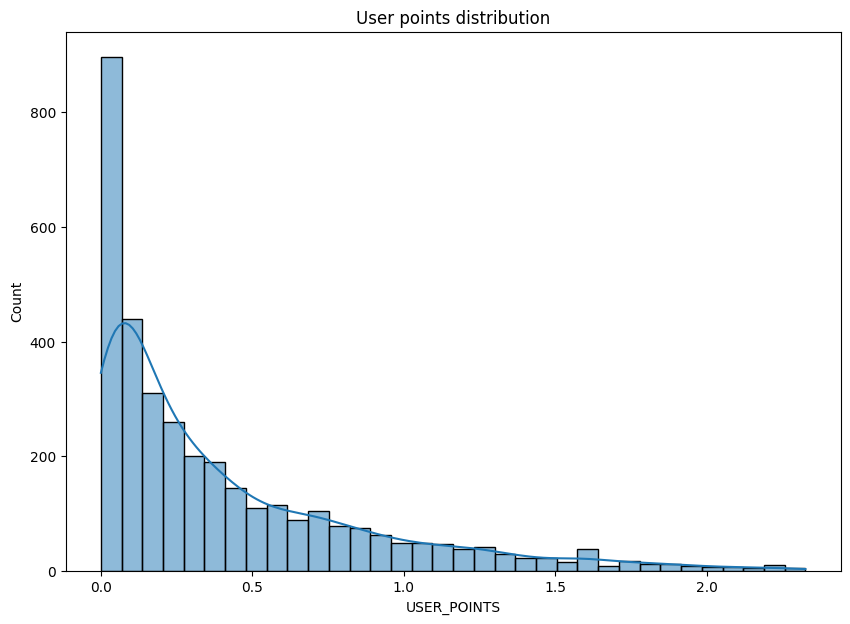

In [78]:
plt.figure(figsize=(10, 7))
sns.histplot(data, x=data["USER_POINTS"], kde=True)
plt.title("User points distribution")
plt.show()

Bivariate (How does User points impact on sales)

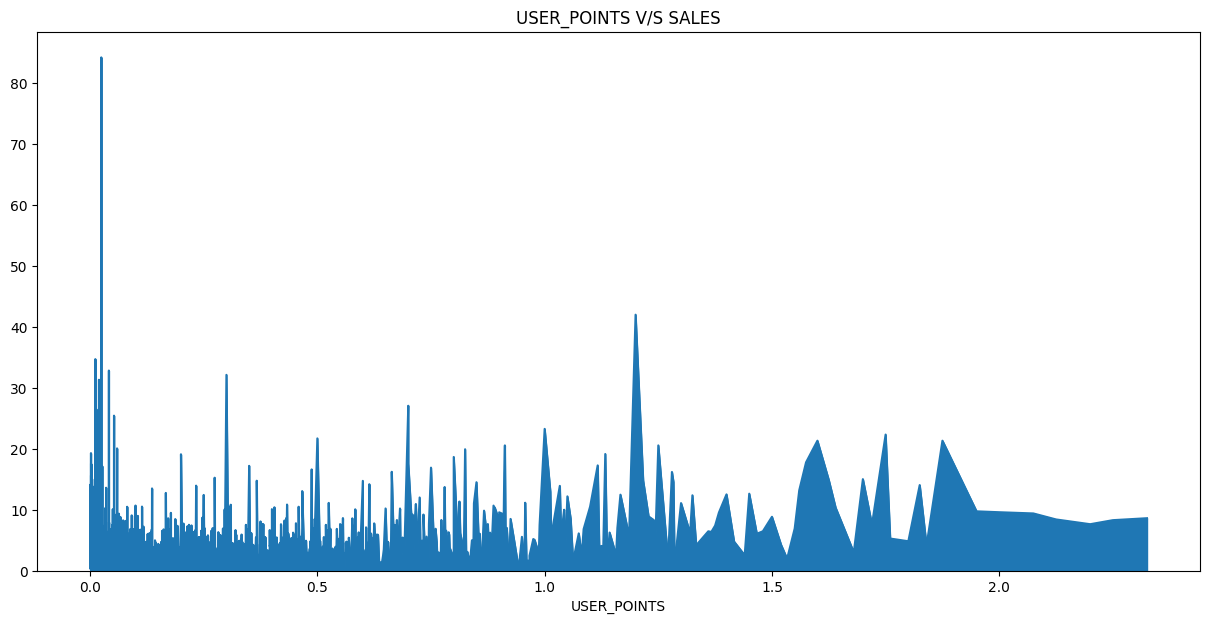

In [76]:
plt.figure(figsize=(15, 7))
grouped_data = data.groupby("USER_POINTS").sum()["SalesInMillions"]
plt.title("USER_POINTS V/S SALES")
grouped_data.plot(kind="area")
plt.show()

**CRITICS_POINTS COLUMN**

Univariate

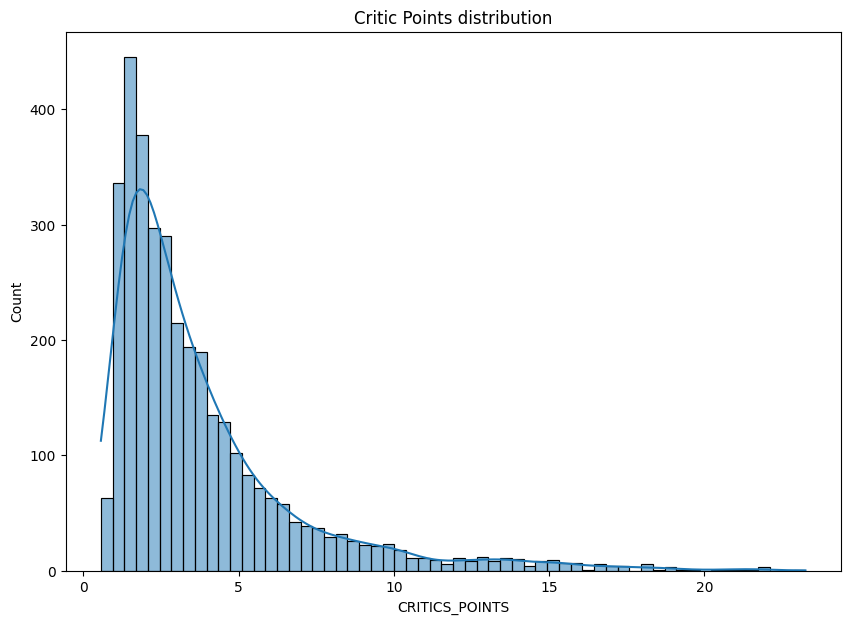

In [75]:
plt.figure(figsize=(10, 7))
sns.histplot(data, x=data["CRITICS_POINTS"], kde=True)
plt.title("Critic Points distribution")
plt.show()

Bivariate (How critics points impacts sales)

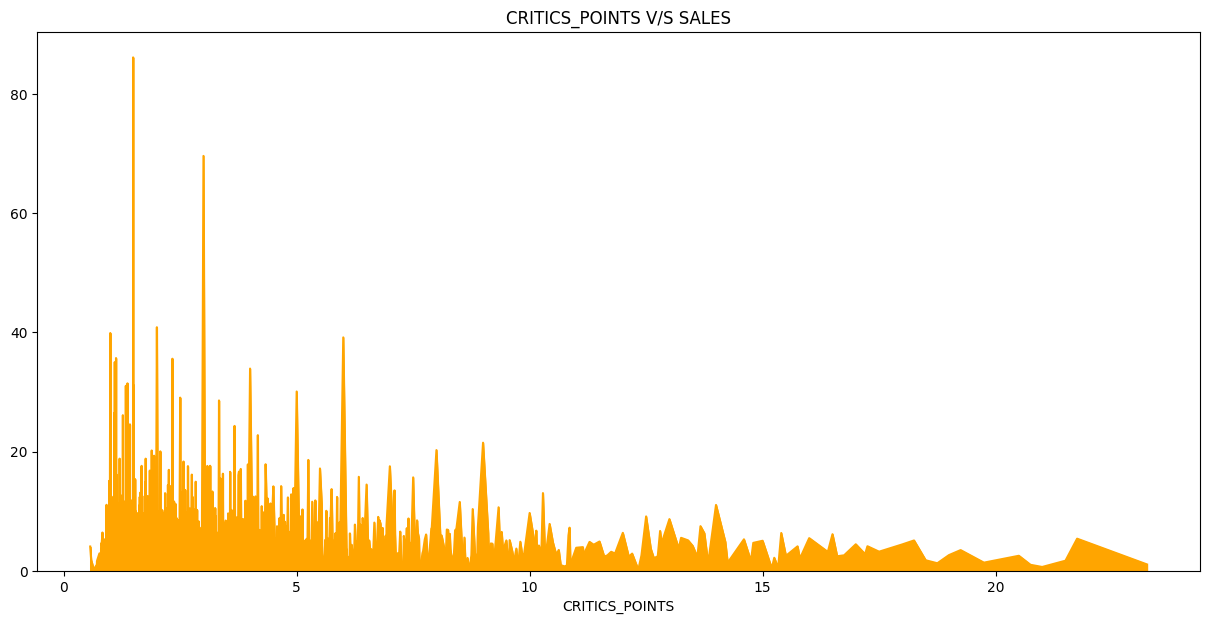

In [77]:
plt.figure(figsize=(15, 7))

grouped_data = data.groupby("CRITICS_POINTS").sum()["SalesInMillions"]
grouped_data.plot(kind="area", color="orange")
plt.title("CRITICS_POINTS V/S SALES")
plt.ylabel("")
plt.show()